Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


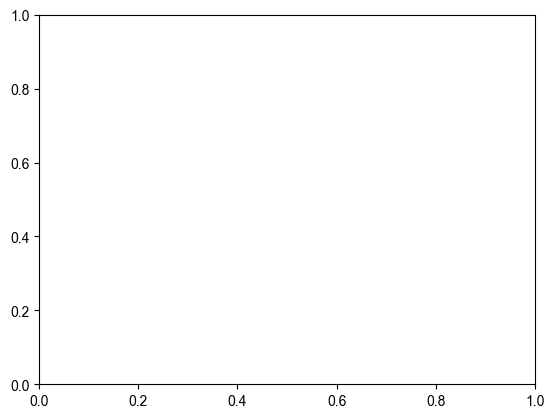

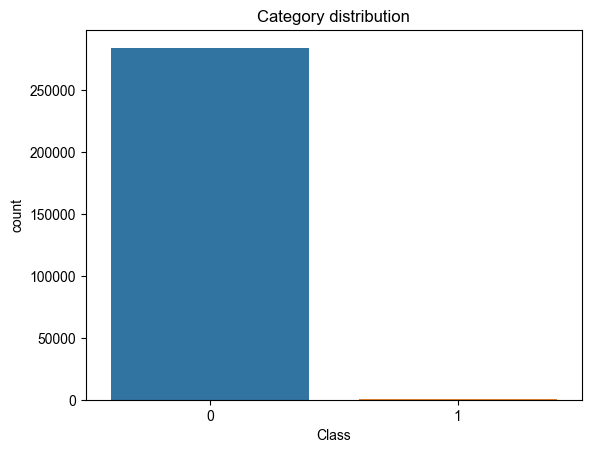

Total number of transactions: 284807
Total number of fraudulent: 492
Fraud transaction ratio: 0.001727


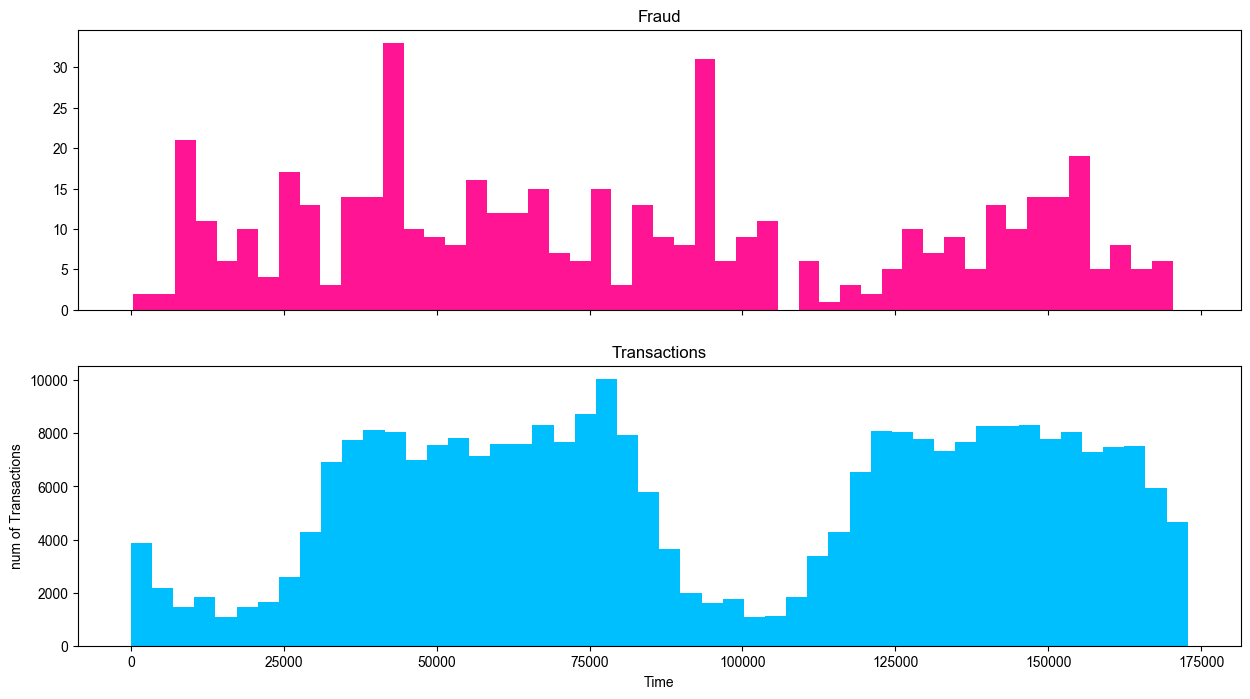

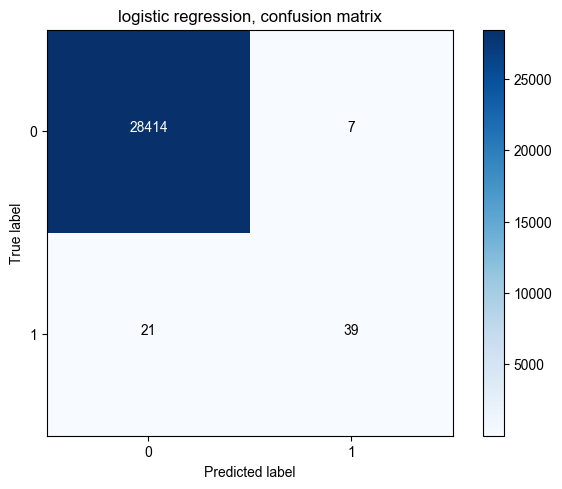

accuracy: 0.848
recall: 0.650
F1: 0.736


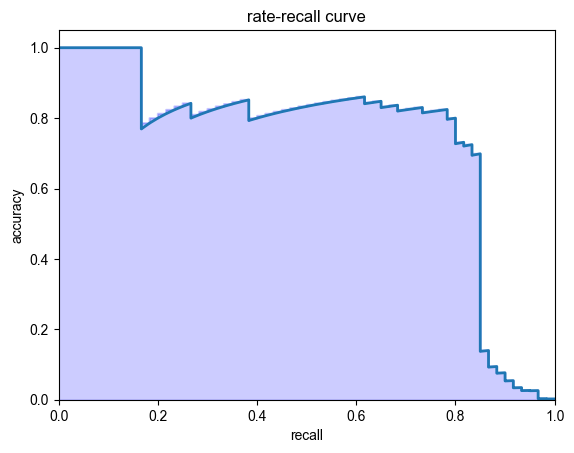

In [20]:
# use logistic regression analysis credit card fraud

"""
This data set cannot be uploaded if it exceeds the limit, please download it from Baidu Netdisk

链接: https://pan.baidu.com/s/191kIq4Rs4TGgBUHwGXf3kg 提取码: ofob 
--来自百度网盘超级会员v5的分享
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

# Confusion matrix visulization
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment = 'center',
            color = 'white' if cm[i,j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# show model evaluation results
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('accuracy: {:.3f}'.format(tp/(tp+fp)))
    print('recall: {:.3f}'.format(tp/(tp+fn)))
    print('F1: {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))))

# drwa precision rate-recall rate curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step = 'post', alpha = 0.2, color = 'b')
    plt.plot(recall, precision, linewidth = 2)
    plt.xlim([0.0,1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('recall')
    plt.ylabel('accuracy')
    plt.title('rate-recall curve')
    plt.show()

# load data
data = pd.read_csv('./data/creditcard.csv')
data.shape
print(data.columns)

# set plt show chinese
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# draw classifier 
plt.figure()
ax = sns.countplot(x = 'Class', data = data)
plt.title('Category distribution')
plt.show()

# show the number of transactions, the number of fraudulent transactions
num = len(data)
num_fraud = len(data[data['Class'] == 1])
print('Total number of transactions:', num)
print('Total number of fraudulent:', num_fraud)
print('Fraud transaction ratio: {:.6f}'.format(num_fraud/num))

# show fraud and transactions image
f, (ax1, ax2)  = plt.subplots(2, 1, sharex=True, figsize = (15, 8))
bins = 50
ax1.hist(data.Time[data.Class==1], bins = bins, color = 'deeppink')
ax1.set_title('Fraud')
ax2.hist(data.Time[data.Class == 0], bins = bins, color = 'deepskyblue')
ax2.set_title('Transactions')
plt.xlabel('Time')
plt.ylabel('num of Transactions')
plt.show()

# Data normalization for amount
data['Amount_Norm'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

# Feature selection
y = np.array(data.Class.tolist())
data = data.drop(['Time', 'Amount', 'Class'], axis = 1)
X = np.array(data.values)

# Prepare training set and test set
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.1, random_state=33)

# logistic regression
clf = LogisticRegressionCV()
clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

# Confidence score of the predicted sample
score_y = clf.decision_function(test_x)

# Calculate the confusion matrix and display
cm = confusion_matrix(test_y, predict_y)
class_names = [0, 1]

# show the confusion matrix
plot_confusion_matrix(cm, classes = class_names, title = 'logistic regression, confusion matrix')

# show model evaluation score
show_metrics()

# set rate, recall, threshold for visualization
precision, recall, thresholds = precision_recall_curve(test_y, score_y)
plot_precision_recall()

